In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# dff = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
# dff.to_csv('Data_for_UCI_named.csv')

In [7]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [8]:
df.head()

,Unnamed: 0,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [9]:
df.describe()

,Unnamed: 0,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2886.89568,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.00000,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2499.75000,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,4999.50000,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7499.25000,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9999.00000,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [10]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  10000
Number of columns:  15


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   tau1        10000 non-null  float64
 2   tau2        10000 non-null  float64
 3   tau3        10000 non-null  float64
 4   tau4        10000 non-null  float64
 5   p1          10000 non-null  float64
 6   p2          10000 non-null  float64
 7   p3          10000 non-null  float64
 8   p4          10000 non-null  float64
 9   g1          10000 non-null  float64
 10  g2          10000 non-null  float64
 11  g3          10000 non-null  float64
 12  g4          10000 non-null  float64
 13  stab        10000 non-null  float64
 14  stabf       10000 non-null  object 
dtypes: float64(13), int64(1), object(1)
memory usage: 1.1+ MB


In [12]:
df.nunique()

Unnamed: 0    10000
tau1          10000
tau2          10000
tau3          10000
tau4          10000
p1            10000
p2            10000
p3            10000
p4            10000
g1            10000
g2            10000
g3            10000
g4            10000
stab          10000
stabf             2
dtype: int64

In [13]:
# drop Unnamed: 0 and stab columns
df.drop(columns=['Unnamed: 0','stab'], axis = 1, inplace = True)

In [14]:
#check distribution of target variable stabf
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

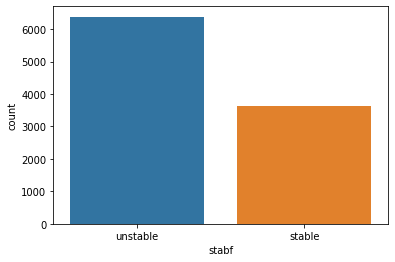

In [15]:
sns.countplot(x='stabf', data=df)

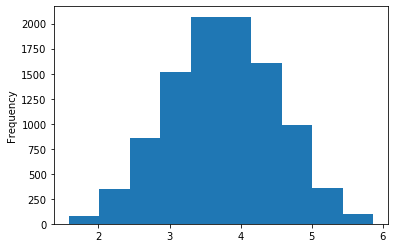

In [16]:
# checking on p1 distribution
df['p1'].plot.hist()

In [17]:
#checking for null values in the dataset
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stabf    0
dtype: int64

In [18]:
#check the datatype of the dataset
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stabf     object
dtype: object

### Feature and Target

In [19]:
#separating the target variable and selecting some samples
X = df.drop('stabf', axis=1)
y = df['stabf']

In [20]:
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [21]:
y.head()

0    unstable
1      stable
2    unstable
3    unstable
4    unstable
Name: stabf, dtype: object

In [22]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

### Scaling the data using Standard Scaler

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [25]:
sc.fit(x_train, y_train)
sc_x_train = sc.transform(x_train)
sc_x_train = pd.DataFrame(sc_x_train, columns=x_train.columns)
sc_x_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [26]:
# scaling test data
sc_x_test = sc.transform(x_test)
sc_x_test = pd.DataFrame(sc_x_test, columns=x_test.columns)

### USING LOGISTIC REGRESSION

In [27]:
#All processing done, we can start logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(sc_x_train, y_train)

LogisticRegression()

In [28]:
# making predictions
predict_y = log_reg.predict(sc_x_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [30]:
confusion_matrix(y_test, predict_y)

array([[ 494,  218],
       [ 174, 1114]], dtype=int64)

In [31]:
classification_report(y_test, predict_y)

'              precision    recall  f1-score   support\n\n      stable       0.74      0.69      0.72       712\n    unstable       0.84      0.86      0.85      1288\n\n    accuracy                           0.80      2000\n   macro avg       0.79      0.78      0.78      2000\nweighted avg       0.80      0.80      0.80      2000\n'

In [32]:
accuracy_score(y_test, predict_y).round(2)

0.8

In [33]:
scores = cross_val_score(log_reg, sc_x_train, y_train, cv=5, scoring='f1_macro')
scores

array([0.8049015 , 0.80345987, 0.80785034, 0.79645688, 0.7835111 ])

### MEASURING CLASSIFICATION PERFORMANCE ON LOGISTIC REGRESSION

In [ ]:
#cross validation score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, sc_x_train, y_train, cv=5, scoring='f1_macro')
scores

In [ ]:
#LeaveOneOut
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), sc_x_train, y_train, \
                        cv=loo, scoring='f1_macro')
average_score = scores.mean() * 100
print("Average score %.2f" % average_score)

In [ ]:
#confusion matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
new_predictions = log_reg.predict(sc_x_test)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=['stable', 'unstable'])
cnf_mat

### METRICS

In [ ]:
#Accuracy score
accuracy = accuracy_score(y_true = y_test, y_pred = new_predictions)
print('Accuracy: {}'.format(round(accuracy*100, 2)))

In [ ]:
#precision
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))

In [ ]:
#recall
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2))

In [ ]:
#F1 scores
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label='stable')
print('F1: {}'.format(round(f1*100), 2))

In [ ]:
# checking combined report using classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, new_predictions))

## BOOSTING

#### Extra Tree Classifier

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, recall_score, f1_score, precision_score, accuracy_score, confusion_matrix

In [35]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

In [36]:
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [38]:
xTree = ExtraTreesClassifier(random_state=1)
rndModel = RandomizedSearchCV(xTree, hyperparameter_grid,
                              cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = 1)

In [39]:
rndModel.fit(sc_x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [40]:
#checking for the best estimator for the model
rndModel.best_estimator_

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1)

In [41]:
#checking for the best parameter for the model
rndModel.best_params_.values()

dict_values([1000, 2, 8, None])

In [42]:
xTreeRnd_pred = rndModel.predict(sc_x_test)

**METRICS**

In [55]:
print(classification_report(y_test, xTreeRnd_pred, digits =4))

              precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



In [80]:
print("Precision Score:", precision_score(y_test, xTreeRnd_pred, pos_label='stable').round(4))

Precision Score: 0.9211


In [79]:
print("Accuracy Score:", accuracy_score(y_test, xTreeRnd_pred).round(4))

Accuracy Score: 0.927


In [50]:
print("Confusion Matrix: \n", confusion_matrix(y_test, xTreeRnd_pred))

Confusion Matrix: 
 [[ 619   93]
 [  53 1235]]


In [45]:
xTree = ExtraTreesClassifier(random_state=1)
New_rndModel = RandomizedSearchCV(xTree, hyperparameter_grid, random_state = 1)

In [46]:
New_rndModel.fit(sc_x_train, y_train)

RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=1),
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1)

In [51]:
xTreeRnd_pred_new = New_rndModel.predict(sc_x_test)

In [78]:
print("New Accuracy Score:", accuracy_score(y_test, xTreeRnd_pred).round(4))

New Accuracy Score: 0.927


**XGBoost and LGM**

In [57]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [58]:
xgb = XGBClassifier(random_state=1, max_depth=3, learning_rate=0.1)
lgbm = LGBMClassifier(random_state=1)

In [59]:
xgb.fit(sc_x_train, y_train)
lgbm.fit(sc_x_train, y_train)

LGBMClassifier(random_state=1)

In [60]:
xgb_pred = xgb.predict(sc_x_test)
lgbm_pred = lgbm.predict(sc_x_test)

In [61]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [62]:
print("Classification Report of XGBoost\n", classification_report(y_test, xgb_pred))

Classification Report of XGBoost
               precision    recall  f1-score   support

      stable       0.92      0.85      0.88       712
    unstable       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



In [63]:
print(confusion_matrix(y_test, xgb_pred))

[[ 603  109]
 [  52 1236]]


In [65]:
print('XGBoost Accuracy: ', accuracy_score(y_test, xgb_pred).round(4))

XGBoost Accuracy:  0.9195


LGBM report

In [66]:
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

      stable       0.93      0.89      0.91       712
    unstable       0.94      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



In [67]:
print(confusion_matrix(y_test, lgbm_pred))

[[ 635   77]
 [  48 1240]]


In [81]:
print('LGBM Accuracy: ', accuracy_score(y_test, lgbm_pred).round(4))

LGBM Accuracy:  0.9375


### RANDOM FOREST

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(sc_x_train, y_train)

RandomForestClassifier(random_state=1)

In [71]:
rfc_pred = rfc.predict(sc_x_test)

In [72]:
print(classification_report(y_test, rfc_pred, digits=3))

              precision    recall  f1-score   support

      stable      0.919     0.878     0.898       712
    unstable      0.934     0.957     0.946      1288

    accuracy                          0.929      2000
   macro avg      0.927     0.918     0.922      2000
weighted avg      0.929     0.929     0.929      2000



In [75]:
print("Accuracy of Random Forest Classifier: ", accuracy_score(y_test, rfc_pred))

Accuracy of Random Forest Classifier:  0.929
